# 0. 분석 목표

1. 계절별 매출액  
=>각 계절마다 매출액이 높은 업종을 찾기   

2. 음식점 총 매출액에서 한식, 양식, 중식의 매출액 비교    
=>제주도에서 어떤 음식점이 강세인지 파악하기.  

3. 시별 총 매출액  
=> 어떤 시에서 매출액이 많이 나오는지 파악하기  
=> 이후, 매출액이 왜 많이 나오는지 파악  
	ㄴ> 이때 유동인구 기반해서 파악해보기 (ex.거주인구 너 때문? 근무인구 너 때문? 방문인구 너야?)  
=> 어떤 업종이 시의 매출액에 많은 기여를 했는지  


4. 읍면동명별 매출액  
=> 어떤 읍면동에서 매출액이 많이 나오는지 파악하기  
=> 어떤 읍면동이 매출액이 많이 나오는지 파악이 되면 왜 매출액이 많이 나올까 파악  
	ㄴ> 마찬가지로 유동인구 기반해서 파악해보기(유동인구 때문에 매출액이 많이 나올까?)  
		(가설 : 매출액이 많으면 유동인구가 많다)  
=> 그 읍면동에서 어떤 업종이 매출액에 많은 기여를 했는지  

5. 성별 매출액  
=> 어떤 성의 매출액이 더 높은지 파악하기 (특정 성별 타겟 정하기)  

6. 매출액이 가장 큰 "업종 대분류" 中, 가장 큰 비율을 차지하는 소업종  


7. 어떤 달이 매출이 가장 큰지 파악하기  
=> 왜 그 달에 매출이 가장 큰지 유추해보기  
=> 데이터로는 알아볼 수 없지만, 연휴인지 휴가철인지 파악할 수 있을듯.  

8. 유동인구(방문인구)가 가장 많은 시 or 읍 찾아보기  
	(가설 : 유동인구가 많으면 매출액이 많다)  
=> 유동인구가 많은 곳이 매출액이 많은지 적은지 파악  
=> IF 유동인구가 많은 곳이 매출액이 많다면 -> 1. 유동인구의 성별 파악 2. 어떤 업종이 많은지 파악  


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:\\study\\workspace_python\\pdsample\상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv')

In [22]:
df_cd = df.copy()

In [146]:
df_cd.head()

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월,계절,업종 대분류
0,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업
1,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2017,1,겨울,주류
2,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2017,1,겨울,숙박업
3,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615,2017,1,겨울,기타
4,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업


# 1. 분석

## 1.1 계절별 매출액

1. 매출액이 가장 높은 계절 찾기  
2. 각 계절별 매출액이 높은 업종 대분류 찾기

#### 1.1.1 매출액이 가장 높은 계절 찾기

In [42]:
#여름 > 가을 > 봄 > 겨울 순으로 매출액 나타남
df_cd.groupby(['계절'])['이용금액'].mean()
print('가을 소비자 이용금액 평균 : {:.0f} 만원'.format(df_cd.groupby(['계절'])['이용금액'].mean()[0]))
print('겨울 소비자 이용금액 평균 : {:.0f} 만원'.format(df_cd.groupby(['계절'])['이용금액'].mean()[1]))
print('봄 소비자 이용금액 평균 : {:.0f} 만원'.format(df_cd.groupby(['계절'])['이용금액'].mean()[2]))
print('여름 소비자 이용금액 평균 : {:.0f} 만원'.format(df_cd.groupby(['계절'])['이용금액'].mean()[3]))



가을 소비자 이용금액 평균 : 61600226 만원
겨울 소비자 이용금액 평균 : 58115222 만원
봄 소비자 이용금액 평균 : 59600239 만원
여름 소비자 이용금액 평균 : 65295841 만원


<AxesSubplot:xlabel='계절', ylabel='이용금액'>

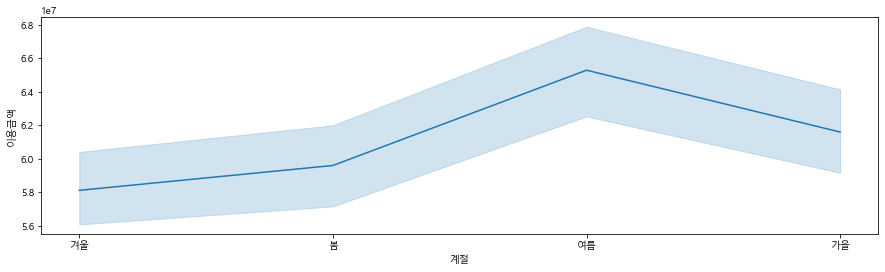

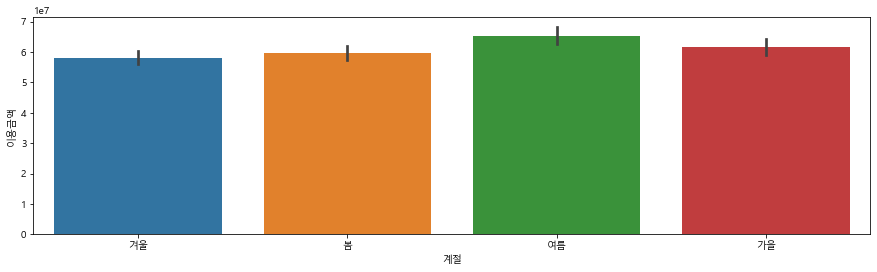

In [133]:
#계절별 이용금액 시각화
import matplotlib as mp
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize = (15,4))
sns.lineplot(data = df_cd, x = '계절', y = '이용금액')
plt.figure(figsize = (15,4))
sns.barplot(data = df_cd, x = '계절', y = '이용금액')

***※계절별로 평균 매출액을 비교했을 경우, 여름 > 가을 > 봄 > 겨울 순으로 높은 매출액을 기록***

> 잠깐 ! 조원들과 이야기를 해보자. ㅠ

#### 1.1.2 각 계절별 매출액이 높은 업종 대분류 찾기

In [162]:
#계절별 그래프를 만드는 함수 생성

def season_graph(season_name):
    
    title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
    }
    
    season_graph = df_cd.groupby(['계절','업종 대분류'])['이용금액'].median()[season_name]
    plt.figure(figsize = (15,4))
    plt.ylabel('이용금액')
    plt.title('{} 그래프'.format(season_name), fontdict = title_font)
    season_graph.plot(kind = 'bar', rot = 0)
    season_graph.plot(color = 'red', legend = True, marker = 'o', linestyle = '--')
    

##### 가을

median 기반

In [159]:
#가을
# 운송업 > 음식점 > 소매업 > 기타 > 숙박업 > 주류 > 서비스업 순으로 매출액을 기록 (평균으로 했을시)
#아래 결과는 중앙값으로 했을시

df_cd.groupby(['계절','업종 대분류'])['이용금액'].median()['가을'].sort_values(ascending = False)

업종 대분류
음식점     18266363.5
소매업     14799156.0
숙박업     12236178.0
주류       9416310.0
운송업      7978620.0
기타       5620400.0
서비스업      331000.0
Name: 이용금액, dtype: float64

##### 겨울

median 기반

In [67]:
#겨울
#운송업 > 음식점 > 소매업 > 기타 > 주류 > 숙박업 > 서비스업 (평균으로 했을시)
#아래 결과는 중앙값으로 했을시

df_cd.groupby(['계절','업종 대분류'])['이용금액'].median()['겨울'].sort_values(ascending = False)


업종 대분류
음식점     17390620.0
소매업     13838775.0
숙박업     10581757.5
주류       8962210.0
운송업      6731890.0
기타       6367770.0
서비스업      270000.0
Name: 이용금액, dtype: float64

##### 봄

In [68]:
#봄
#운송업 > 음식점 > 소매업 > 기타 > 주류 > 숙박업 > 서비스업 (평균으로 했을시)
#아래 결과는 중앙값으로 했을시

df_cd.groupby(['계절','업종 대분류'])['이용금액'].median()['봄'].sort_values(ascending = False)

업종 대분류
음식점     17835620.0
소매업     13565045.0
숙박업     10374100.0
주류       9581720.0
운송업      6536250.0
기타       6165750.0
서비스업      309000.0
Name: 이용금액, dtype: float64

##### 여름

In [69]:
#여름
#운송업 > 음식점 > 소매업 > 숙박업 > 기타 > 주류 > 서비스업 (평균으로 했을시)
#아래 결과는 중앙값으로 했을시

df_cd.groupby(['계절','업종 대분류'])['이용금액'].median()['여름'].sort_values(ascending = False)

업종 대분류
음식점     20831100.0
소매업     14483500.0
숙박업     12991890.0
운송업     11713485.0
주류      11380595.0
기타       5973000.0
서비스업      401000.0
Name: 이용금액, dtype: float64

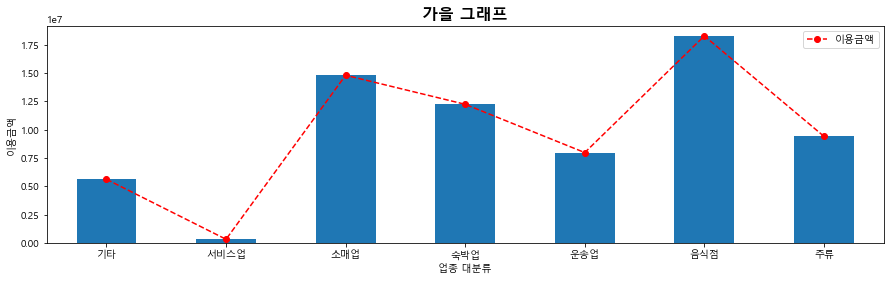

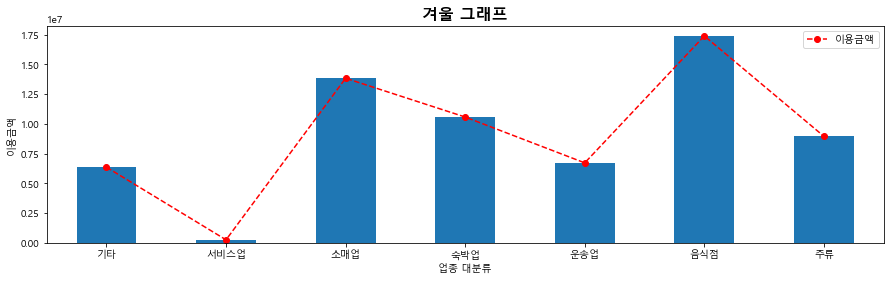

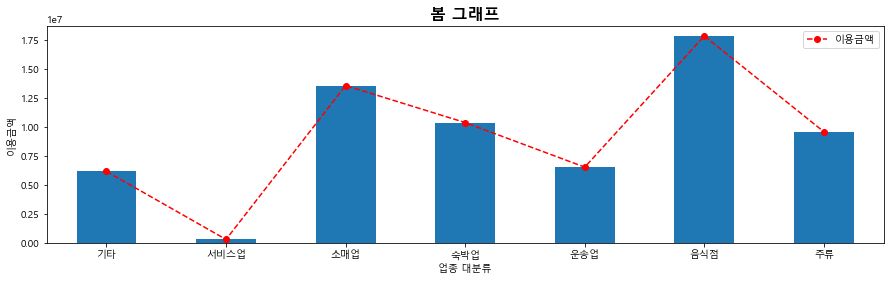

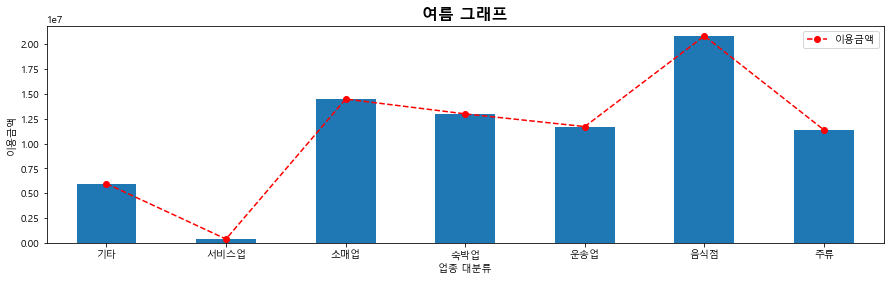

In [163]:
#봄,여름,가을,겨울 각 계절 별로 어떤 업종이 높은 매출을 기록하고 있는지 확인하기

season_graph('가을')
season_graph('겨울')
season_graph('봄')
season_graph('여름')


## 1.2 음식점 업종 매출액 분석

계절별로 대분류 업종의 매출액을 분석해본 결과 음식점이 가장 많은 매출액을 차지하고 있다.  
다음으로 음식점 중에 어떤 음식점이 높은 매출액을 가지고 있는지 분석해볼 예정이다.    
이러한 분석을 통해서 음식점을 창업하려고 하는 창업자에게 어떤 종류의 식당을 창업해야하는지 알려줄 수 있다.  

  
  
1. 음식점 업종 중 가장 높은 매출을 기록하고 있는 업종을 찾기  
2. 가장 높은 매출액을 기록하고 있는 업종은 어느 지역에서 높은 매출액을 기록하는지 파악하기

In [177]:
#음식점 중에서 가장 높은 이용금액을 가지고 있는 업종 찾기

group_food = df_cd.groupby(['업종 대분류','업종명'])['이용금액'].median()['음식점']
group_food.sort_values(ascending = False)

업종명
한식 음식점업                    260876430.5
서양식 음식점업                    24252525.0
일식 음식점업                     21790555.0
피자, 햄버거, 샌드위치 및 유사 음식점업     13679100.0
중식 음식점업                      9290750.0
기타 외국식 음식점업                  5817700.0
Name: 이용금액, dtype: float64

<AxesSubplot:title={'center':'음식점별 매출액'}, xlabel='업종명', ylabel='이용금액'>

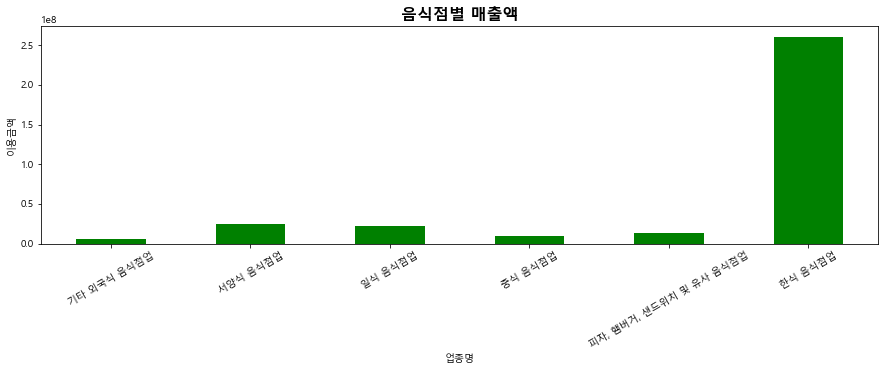

In [189]:
plt.figure(figsize = (15,4))
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
    }
plt.title('음식점별 매출액', fontdict = title_font)
plt.ylabel('이용금액')
group_food.plot(kind = 'bar', rot = 30, color = 'green')

# 내일 해야 할 분석 및 시각화

**1. 계절별로 분석을 해보니 음식점, 소매업, 숙박업이 모든 계절에서 1~3위를 기록하고 있다.**   

=> 1~3위를 기록하는 대분류 업종 각각에서 ***가장 많은 매출을 기록하는 소분류 업종*** 을 찾자. 
이를 통해, 음식점을 창업하려는 창업자에게 어떤 종류의 음식점을 창업해야 매출을 높일 수 있는지 알려줄 수 있다.  
2,3위 대분류 업종도 마찬가지  


**2. 가장 높은 매출을 기록하고 있는 계절은 여름이며, 여름에는 봄과 대비해서 숙박업과 운송업의 상승이 눈에 띄게 있음을 알 수 있다.**  

=> 여름 한철 장사를 원하는 창업자에게 숙박업과 운송업을 추천해줄 수 있다.
=> 여름철 어떤 숙박업과 운송업이 가장 높은 매출을 기록하는지 뽑아내서 창업자에게 추천할 수 있다.  

**3. 음식점 업종 매출액 분석 수치 내놓고 그래프 그리기**  
=> 가장 높은 매출액을 기록하고 있는 음식점 업종을 찾자.  
=> 가장 높은 매출액을 기록하고 있는 음식집 업종은 어떤 지역에서 높은 매출을 기록하고 있는지 찾고, 그 지역을 ceo에게 추천해주자.


